# NLP Project part 1

## Dataset name

California Independent Medical Review Dataset

## Dataset Description

This data is from the California Department of Managed Health Care (DMHC). It contains all decisions from Independent Medical Reviews (IMR) administered by the DMHC since January 1, 2001.

Independent Medical Review (IMR) is a process that allows patients in the United States to request an independent review of their medical treatment or a denial of their health insurance claim. It is used in the context of managed care plans, such as Health Maintenance Organizations (HMOs), and is designed to provide an impartial and objective evaluation of medical decisions.

IMR is typically used when a patient disagrees with a decision made by their health insurance company regarding the medical necessity of a treatment, procedure, or medication. In this case, the patient can request an IMR, which is conducted by an independent medical professional who is not affiliated with the insurance company.

The IMR process is regulated by state law, and the specifics can vary by state. However, in general, the IMR process involves the patient submitting a request for review, the independent reviewer evaluating the medical records and information provided by both the patient and the insurance company, and the reviewer issuing a decision that is binding on both parties. The goal of IMR is to provide patients with an objective evaluation of their medical treatment and ensure that they receive the appropriate care they need.

<hr style="border-color: black; border-width: 3px; opacity: 0.5;">

# Data Exploration and Pre-processing of data

In [51]:
pip install transformers


  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/fc/04/0aad491cd98b09236c54ab849863ee85421eeda5138bbf9d33ecc594652b/transformers-4.36.1-py3-none-any.whl.metadata
     ------------------------------------ 126.8/126.8 kB 392.3 kB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.19.3 from https://files.pythonhosted.org/packages/05/09/1945ca6ba3ad8ad6e2872ba682ce8d68c5e63c8e55458ed8ab4885709f1d/huggingface_hub-0.19.4-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/9f/90/a6821e7757d2db194c16cbca78c80e206f30f6cc62c7f15fb27428f8c6dd/tokenizers-0.15.0-cp39-none-win_amd64.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/4e/96/f4ee4434d8b6452fe7d5d44df2e72d1c6b2add1c3a5fb5c81aae83cb90c6/safetensors-0.4.1-cp39-none-win_amd64.whl.metadata
  Obtaining dependency information 


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score



df=pd.read_csv("Independent_Medical_Reviews.csv")
print(df)



      Reference ID  Report Year           Diagnosis Category  \
0       MN16-22639         2016                   Infectious   
1       MN16-22638         2016                       Mental   
2       MN16-22637         2016              Autism Spectrum   
3       EI16-22636         2016       Prevention/Good Health   
4        EI06-5319         2006          Cardiac/Circulatory   
...            ...          ...                          ...   
19240       MN01-7         2001              Trauma/Injuries   
19241       MN01-6         2001                   Infectious   
19242       MN01-5         2001  Orthopedic/ Musculoskeletal   
19243       MN01-4         2001  Orthopedic/ Musculoskeletal   
19244       EI01-3         2001                       Cancer   

           Diagnosis Sub Category                         Treatment Category  \
0                       Hepatitis                Pharmacy/Prescription Drugs   
1                 Eating Disorder                    Mental Health Trea

## Data Overview

In [2]:
df.head(5)

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [3]:
df.describe(include=object)

,Reference ID,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
count,19245,19186,17341,18795,17977,19245,19245,18035,18035,19225
unique,19245,29,278,31,283,2,3,7,2,19198
top,MN16-22639,Orthopedic/ Musculoskeletal,Other,Pharmacy/Prescription Drugs,Other,Upheld Decision of Health Plan,Medical Necessity,51-64,Female,Nature of Statutory Criteria/Case Summary: An...
freq,1,3469,3991,4595,4822,10788,13588,6612,10400,2


In [4]:
df.columns

Index(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings'],
      dtype='object')

In [5]:
df.shape

(19245, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

Reference ID                 0
Report Year                  0
Diagnosis Category          59
Diagnosis Sub Category    1904
Treatment Category         450
Treatment Sub Category    1268
Determination                0
Type                         0
Age Range                 1210
Patient Gender            1210
Findings                    20
dtype: int64

<hr style="border-color: black; border-width: 3px; opacity: 0.5;">

## Checking for duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
# Check for duplicates
duplicates = df.duplicated()

# Summarize the duplicates
duplicate_count = duplicates.sum()

# Identify and remove the duplicate rows
df_unique = df.drop_duplicates()

# Display the duplicate count
print("Duplicate Count:", duplicate_count)

# Display the unique dataset
print("Unique Dataset:")
print(df_unique)

Duplicate Count: 0
Unique Dataset:
      Reference ID  Report Year           Diagnosis Category  \
0       MN16-22639         2016                   Infectious   
1       MN16-22638         2016                       Mental   
2       MN16-22637         2016              Autism Spectrum   
3       EI16-22636         2016       Prevention/Good Health   
4        EI06-5319         2006          Cardiac/Circulatory   
...            ...          ...                          ...   
19240       MN01-7         2001              Trauma/Injuries   
19241       MN01-6         2001                   Infectious   
19242       MN01-5         2001  Orthopedic/ Musculoskeletal   
19243       MN01-4         2001  Orthopedic/ Musculoskeletal   
19244       EI01-3         2001                       Cancer   

           Diagnosis Sub Category                         Treatment Category  \
0                       Hepatitis                Pharmacy/Prescription Drugs   
1                 Eating Disorder   

Theer is no duplicates in this dataset

## Checking for data consistency

In [10]:
display(df.nunique)

<bound method DataFrame.nunique of       Reference ID  Report Year           Diagnosis Category  \
0       MN16-22639         2016                   Infectious   
1       MN16-22638         2016                       Mental   
2       MN16-22637         2016              Autism Spectrum   
3       EI16-22636         2016       Prevention/Good Health   
4        EI06-5319         2006          Cardiac/Circulatory   
...            ...          ...                          ...   
19240       MN01-7         2001              Trauma/Injuries   
19241       MN01-6         2001                   Infectious   
19242       MN01-5         2001  Orthopedic/ Musculoskeletal   
19243       MN01-4         2001  Orthopedic/ Musculoskeletal   
19244       EI01-3         2001                       Cancer   

           Diagnosis Sub Category                         Treatment Category  \
0                       Hepatitis                Pharmacy/Prescription Drugs   
1                 Eating Disorder   

In [11]:
#Categorical Data Overview
df.describe(include=object)

,Reference ID,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
count,19245,19186,17341,18795,17977,19245,19245,18035,18035,19225
unique,19245,29,278,31,283,2,3,7,2,19198
top,MN16-22639,Orthopedic/ Musculoskeletal,Other,Pharmacy/Prescription Drugs,Other,Upheld Decision of Health Plan,Medical Necessity,51-64,Female,Nature of Statutory Criteria/Case Summary: An...
freq,1,3469,3991,4595,4822,10788,13588,6612,10400,2


In [12]:
# Calculate the count of missing values for each column
missing_values_count = df.isnull().sum()

# Print the count of missing values
print(missing_values_count)

Reference ID                 0
Report Year                  0
Diagnosis Category          59
Diagnosis Sub Category    1904
Treatment Category         450
Treatment Sub Category    1268
Determination                0
Type                         0
Age Range                 1210
Patient Gender            1210
Findings                    20
dtype: int64


## Unqiue Values

In [13]:
# Print unique values in categorical columns
categorical_columns = ['Reference ID', 'Report Year', 'Diagnosis Category', 'Diagnosis Sub Category', 'Treatment Sub Category', 'Determination', 'Type', 'Age Range', 'Patient Gender', 'Findings']  # List of categorical column names

# Loop through each column and print each unique value
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Reference ID:
['MN16-22639' 'MN16-22638' 'MN16-22637' ... 'MN01-5' 'MN01-4' 'EI01-3']

Unique values in Report Year:
[2016 2006 2015 2014 2010 2005 2004 2009 2008 2007 2001 2013 2012 2002
 2003 2011]

Unique values in Diagnosis Category:
['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Genetic' 'Genitourinary/ Kidney' 'Vision' 'Trauma/Injuries' nan
 'Organ Failure' 'Alcohol and Drug Addiction']

Unique values in Diagnosis Sub Category:
['Hepatitis' 'Eating Disorder' 'Autism-PDD-NOS' nan
 'Female Breast Disorder' 'Other' 'Fracture' 'Depression - Severe'
 'Diabetes' 'Lipid Storage Disea

## Missing Values

<AxesSubplot:>

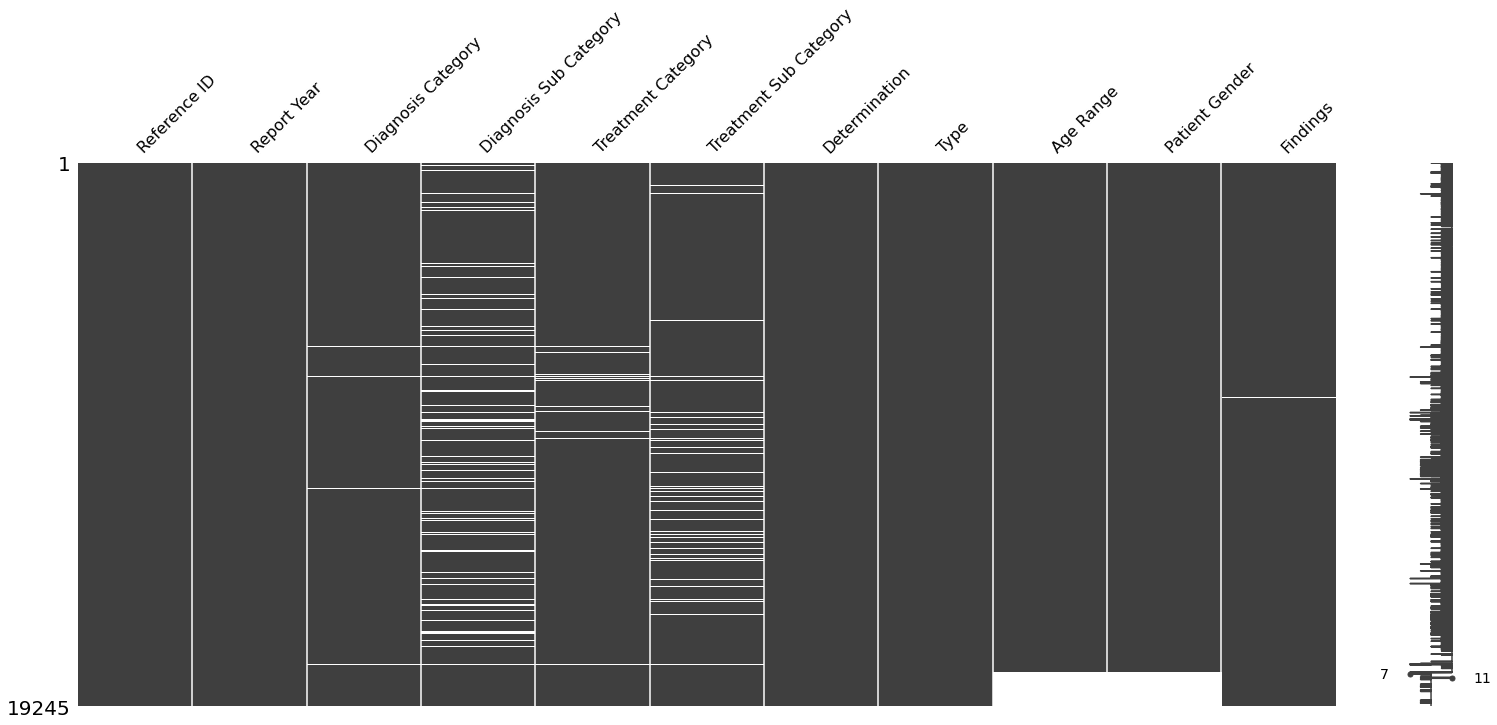

In [14]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

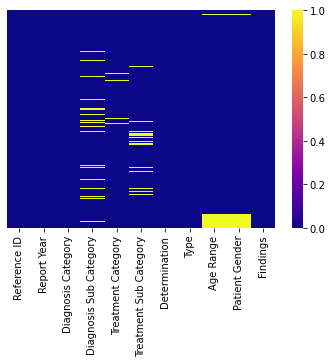

In [15]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=True,cmap = 'plasma',yticklabels=False)

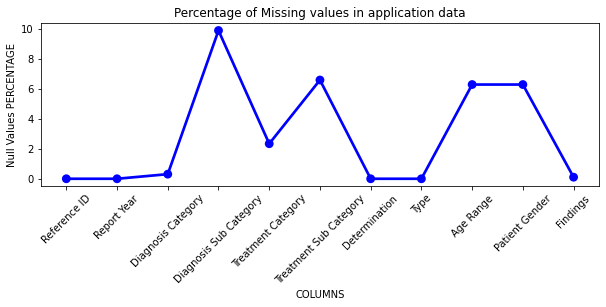

In [16]:
import matplotlib.pyplot as plt

null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['column_name' , 'null_value_percentage']

fig = plt.figure(figsize=(10,3))
ax = sns.pointplot(x="column_name" , y="null_value_percentage" , data = null_df , color="blue")
plt.xticks(rotation=45,fontsize=10)
# ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<hr style="border-color: black; border-width: 3px; opacity: 0.5;">

# EDA of the dataset

In [17]:
cols = ['Report Year', 'Diagnosis Category','Treatment Category',
        'Determination', 'Type','Age Range','Patient Gender']


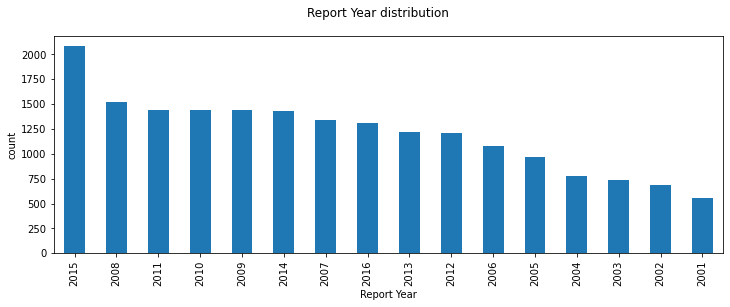

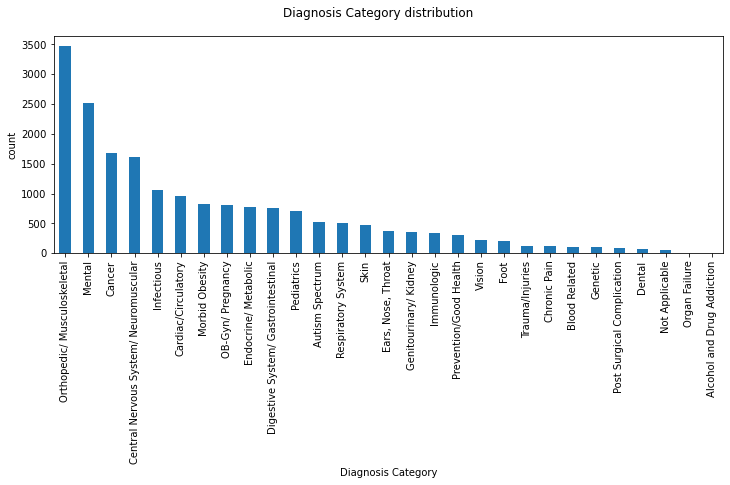

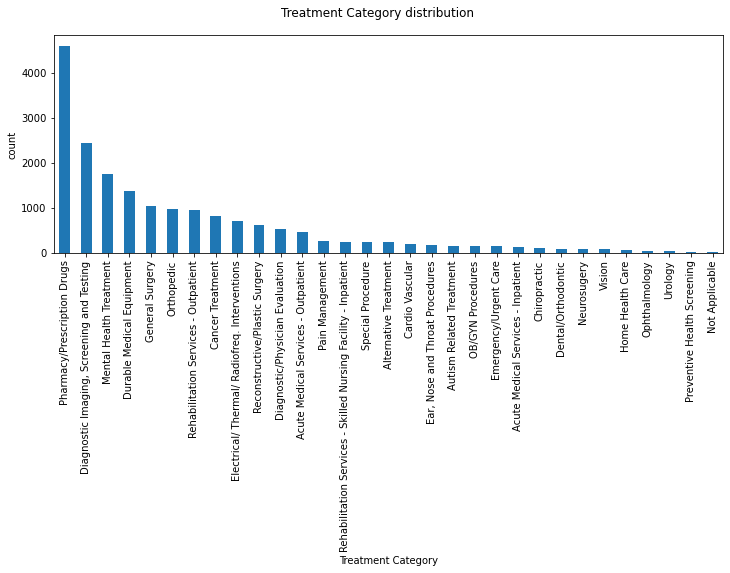

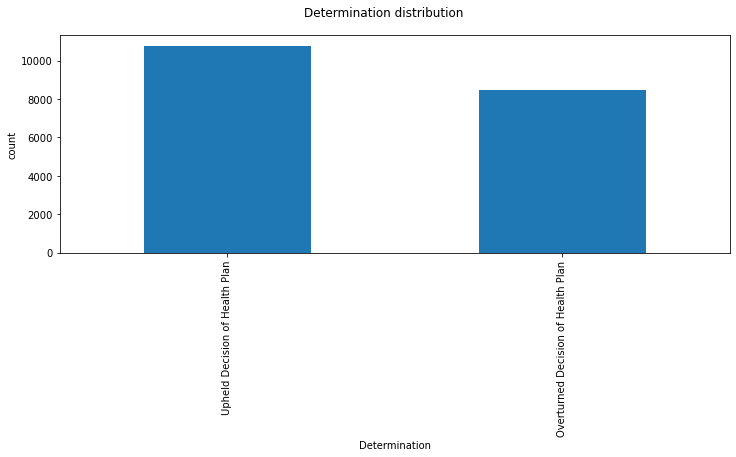

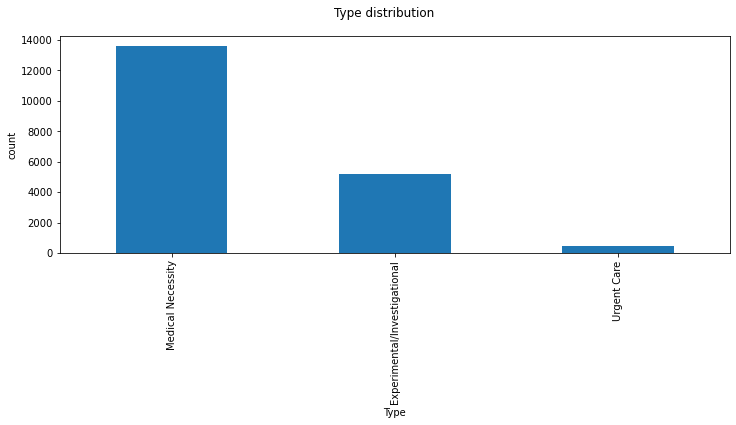

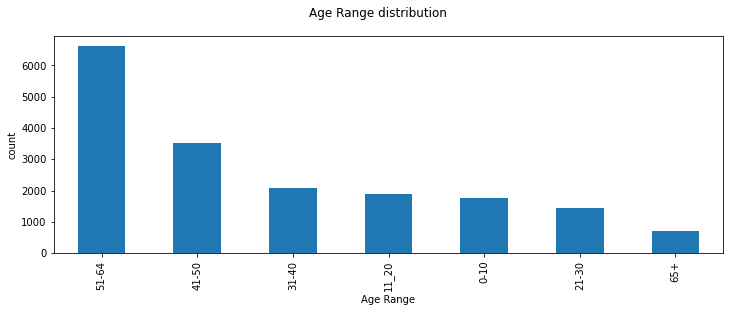

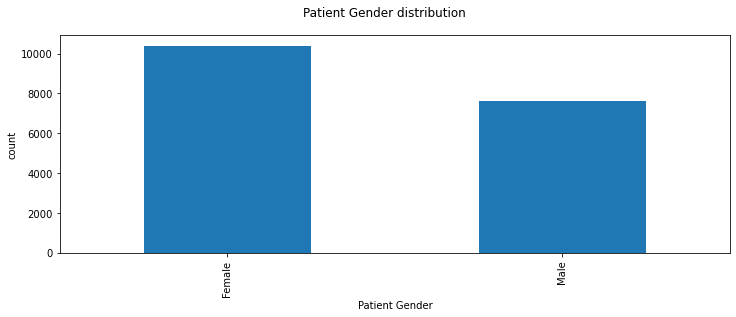

In [18]:
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize = (12, 4))
    
    print("\n")
    plt.suptitle(f"{col} distribution")
    df[col].value_counts().plot(kind = "bar")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    
    plt.show()
    print("\n")

## Visualizing bar chart for each categorical feature

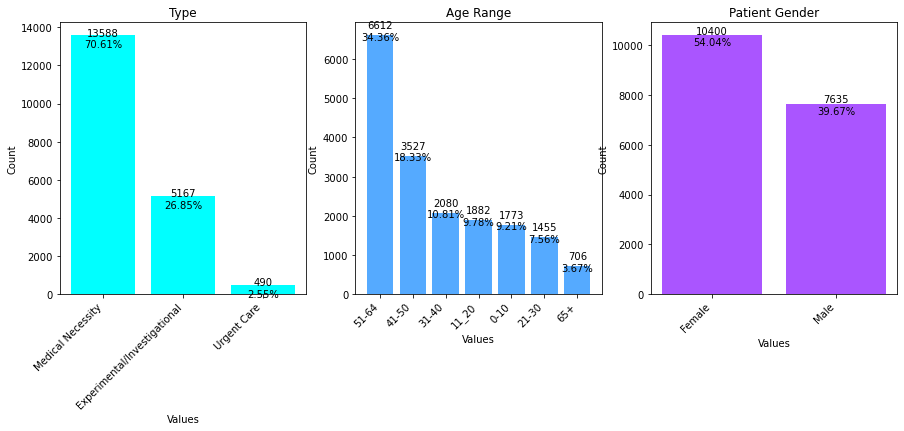

In [19]:
#Listing all categorical_columns
cc = ["Type","Age Range",
     "Patient Gender"] 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cmap = plt.cm.get_cmap('cool')
# Loop through each column
for i, col in enumerate(cc):
    # Group the data by the column and count the number of occurrences of each value
    counts = df[col].value_counts()
    # Compute the total number of rows
    total_rows = len(df)
    # Compute the percentage of rows for each value
    percent = counts / total_rows * 100
    # Create a bar chart in the corresponding subplot
    axs[i].bar(counts.index, counts.values, color=cmap(i/len(cc)))
    # Set the title and axis labels
    axs[i].set_title(col)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Count')
    # Tilt the x-axis labels by 45 degrees
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')
    # Add annotations for each bar
    for j, count in enumerate(counts):
        pct = percent[j]
        axs[i].text(counts.index[j], count + 0.02 * total_rows, f'{count}\n{pct:.2f}%', ha='center', va='top')

# Show the chart
plt.show()

## Gender Distrubition

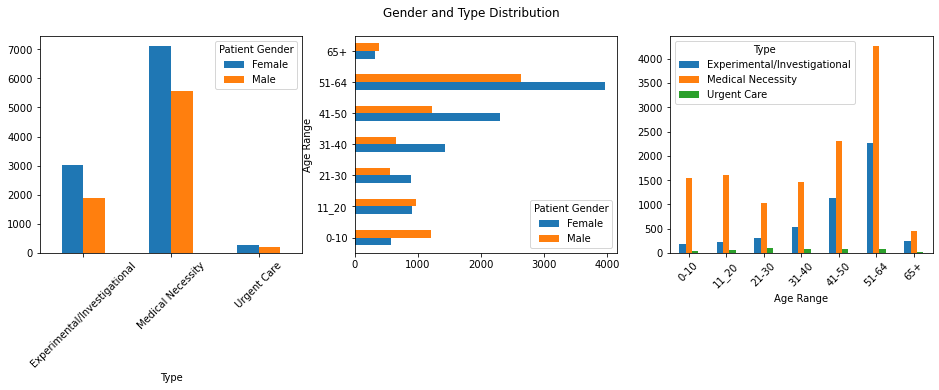

In [20]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

fig.suptitle('Gender and Type Distribution')

d = df.groupby([ 'Type','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0],rot=45,fontsize=10)

d = df.groupby(['Age Range','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='barh', ax=ax[1],fontsize=10)

d = df.groupby(['Age Range','Type',]).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2],rot=45,fontsize=10)

## Diagnosis vs Treatment

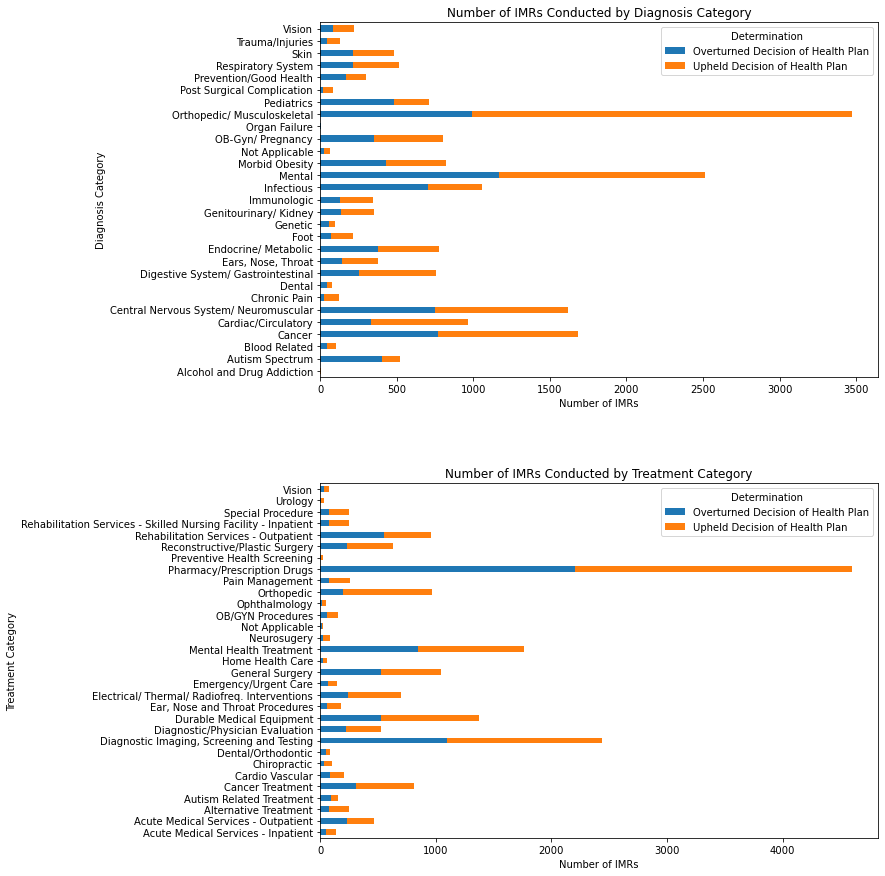

In [21]:
df_grouped = df.groupby(['Diagnosis Category', 'Determination']).size().unstack(fill_value=0)

# Create two subplots for upheld and overturned determinations
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

df_grouped.plot(kind='barh', stacked=True, ax=axs[0])
axs[0].set_title('Number of IMRs Conducted by Diagnosis Category')
axs[0].set_ylabel('Diagnosis Category')
axs[0].set_xlabel('Number of IMRs')

# Group the data by diagnosis category and determination
df_grouped = df.groupby(['Treatment Category', 'Determination']).size().unstack(fill_value=0)

df_grouped.plot(kind='barh', stacked=True, ax=axs[1])
axs[1].set_title('Number of IMRs Conducted by Treatment Category')
axs[1].set_ylabel('Treatment Category')
axs[1].set_xlabel('Number of IMRs')

# Adjust the spacing between subplots and show the plot
plt.subplots_adjust(hspace=0.3)
plt.show()

## Wordcloud for Treatment

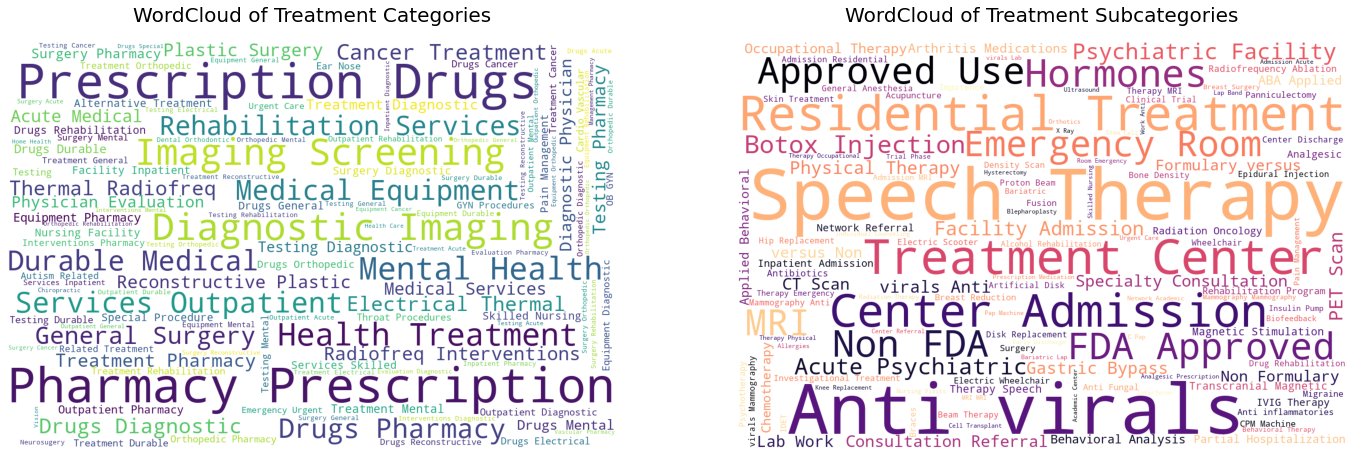

In [22]:
# Replace NaN values with an empty string in the specified columns
from wordcloud import WordCloud
df['Treatment Category'] = df['Treatment Category'].fillna('')
df['Treatment Sub Category'] = df['Treatment Sub Category'].fillna('')

# Convert the list of diagnosis categories and subcategories to a string
text_1 = " ".join(df['Treatment Category'][~df['Treatment Category'].isin(['Other', 'Unknown Category'])].astype(str).tolist())
text_2 = " ".join(df['Treatment Sub Category'][~df['Treatment Sub Category'].isin(['Other', 'Unknown Sub Category'])].astype(str).tolist())

# Remove unnecessary characters from the strings
text_1 = text_1.replace(',', '').replace('[', '').replace("'", '').replace(']', '')
text_2 = text_2.replace(',', '').replace('[', '').replace("'", '').replace(']', '')

# Set the figure size and create two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 16))

# Create a WordCloud object with the specified parameters and plot it on the first subplot
wordcloud1 = WordCloud(background_color='white', colormap='viridis', width=1200, height=800, max_words=121).generate(text_1)
axes[0].imshow(wordcloud1)
axes[0].set_title("WordCloud of Treatment Categories", pad=20, fontsize=20)

# Create another WordCloud object with different parameters and plot it on the second subplot
wordcloud2 = WordCloud(background_color='white', colormap='magma', width=1200, height=800, max_words=121).generate(text_2)
axes[1].imshow(wordcloud2)
axes[1].set_title("WordCloud of Treatment Subcategories", pad=20, fontsize=20)

# Remove the axis labels and tick marks from both subplots
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()

## Wordcloud for Diagnosis

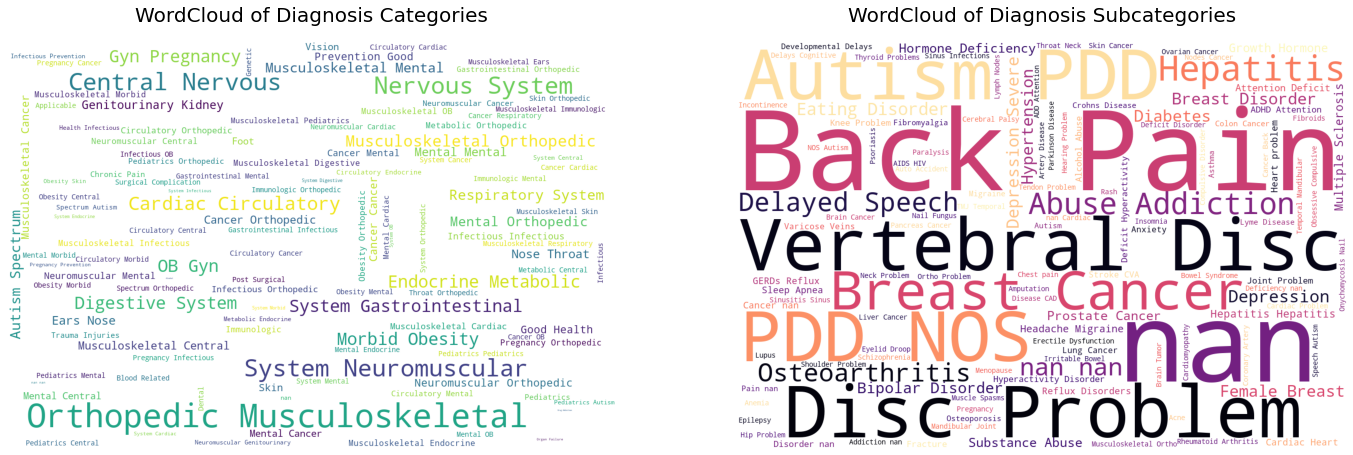

In [23]:
text_1 = " ".join(df['Diagnosis Category'][~df['Diagnosis Category'].isin(['Other', 'Unknown Category'])].astype(str).tolist())
text_2 = " ".join(df['Diagnosis Sub Category'][~df['Diagnosis Sub Category'].isin(['Other', 'Unknown Sub Category'])].astype(str).tolist())

# Remove unnecessary characters from the strings
text_1 = text_1.replace(',', '').replace('[', '').replace("'", '').replace(']', '')
text_2 = text_2.replace(',', '').replace('[', '').replace("'", '').replace(']', '')

# Set the figure size and create two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 16))

# Create a WordCloud object with the specified parameters and plot it on the first subplot
wordcloud1 = WordCloud(background_color='white', colormap='viridis', width=1200, height=800, max_words=121).generate(text_1)
axes[0].imshow(wordcloud1)
axes[0].set_title("WordCloud of Diagnosis Categories", pad=20, fontsize=20)

# Create another WordCloud object with different parameters and plot it on the second subplot
wordcloud2 = WordCloud(background_color='white', colormap='magma', width=1200, height=800, max_words=121).generate(text_2)
axes[1].imshow(wordcloud2)
axes[1].set_title("WordCloud of Diagnosis Subcategories", pad=20, fontsize=20)

# Remove the axis labels and tick marks from both subplots
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()

## Frequency

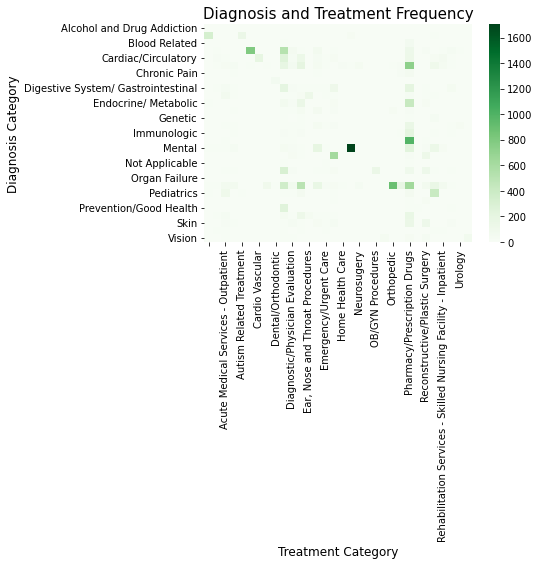

In [24]:
# Pivot the data to create a frequency table of diagnosis category and treatment category
df_pivot = pd.pivot_table(df, index='Diagnosis Category', columns='Treatment Category', aggfunc='size', fill_value=0)

# Create the heatmap with a blue color scheme
sns.heatmap(df_pivot, cmap='Greens')

# Set the title and axis labels
plt.title('Diagnosis and Treatment Frequency', fontsize=15)
plt.xlabel('Treatment Category', fontsize=12)
plt.ylabel('Diagnosis Category', fontsize=12)

# Show the plot
plt.show()

## Correlations

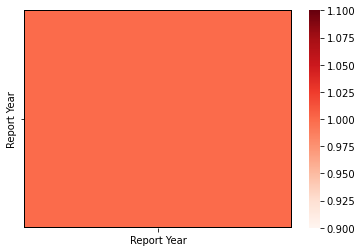

In [25]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<hr style="border-color: black; border-width: 3px; opacity: 0.5;">

# Text Classification

In [26]:
main_df = df[['Findings', 'Determination']]
main_df.sample(3)

,Findings,Determination
11269,The parent of an 11-year-old male enrollee has...,Upheld Decision of Health Plan
3364,A 57-year-old male enrollee has requested inte...,Upheld Decision of Health Plan
18953,The parent of a 6-year old male requested an o...,Upheld Decision of Health Plan


In [27]:
print(f'Number of examples before cleaning = {main_df.shape[0]}')
print(f'Number of examples = {main_df.shape[1]}')

Number of examples before cleaning = 19245
Number of examples = 2


In [28]:
# confirm that feature and label are text data ('object')

data_types = main_df.dtypes
data_types

Findings         object
Determination    object
dtype: object

In [29]:
# Transform labels from nominal categories to ordinal categories

mask = (main_df.Determination == 'Overturned Decision of Health Plan') # create mask
new_target = mask.astype('int') # change mask to integers
main_df = main_df.assign(Determination = new_target) 

In [30]:

num_missing = main_df.isna().sum()
num_missing

Findings         20
Determination     0
dtype: int64

In [31]:
main_df = main_df.dropna(axis = 0)
main_df.isna().sum() # confirm that there are no missing entries

Findings         0
Determination    0
dtype: int64

In [32]:
# show numbers of data points and features

print(f'Number of examples = {main_df.shape[0]}')
print(f'Number of examples = {main_df.shape[1]}')

Number of examples = 19225
Number of examples = 2


In [33]:
# display final dataset

main_df.head(2)

,Findings,Determination
0,Nature of Statutory Criteria/Case Summary: An ...,1
1,Nature of Statutory Criteria/Case Summary: An...,0


## DEFINE UTILITY FUNCTIONS

In [34]:
# plot_training_log - to plot train loss vs val loss & train accuracy vs val accuracy
# get predictions - to make predictions 
# scheduler : to dynamically set learning training rate throughout the training phase

def plot_training_log(history):
    history = pd.DataFrame(data = history.history, index = history.epoch)
    fig, ax = plt.subplots(2,1, sharex = True, figsize = (5,10))
    ax[0].plot(history.index, history.loss, label = 'Train')
    ax[0].plot(history.index, history.val_loss, label = 'Validation')
    ax[0].set_ylim(0.0,0.5)
    ax[0].set_title('Train_loss vs Val_loss')
    ax[0].legend()
    ax[0].set_ylabel('Loss')
    ax[1].plot(history.index, history.accuracy, label = 'Train')
    ax[1].plot(history.index, history.val_accuracy, label = 'Validation')
    ax[1].set_ylim(0.5, 1.0)
    ax[1].set_title('Train_Accuracy vs Val_Accuracy')
    ax[1].legend()
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    plt.show()

def get_predictions(input, label):
    logit = model.predict(input) 
    pred = np.squeeze((logit >= 0.0).astype('int'))
    return pred, label

def scheduler(epoch, lr): 
    if epoch < 10: 
        return 0.001 
    else: 
        return 0.0001

## BUILD MODEL TRAINING PIPELINE

In [35]:
# Create a tf.data.Dataset pipeline 
import tensorflow as tf
Input = main_df['Findings']
output = main_df['Determination']
data_set = tf.data.Dataset.from_tensor_slices((Input,output))

In [36]:
vocab_size = 1000
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = vocab_size)
data_input = data_set.map(lambda x,y: x)
text_vectorizer.adapt(data_input)

In [37]:
original_text = main_df['Findings'][0][:70]
vocab = np.array(text_vectorizer.get_vocabulary())
text_vectors = text_vectorizer(original_text).numpy()
transcript = ' '.join(vocab[text_vectors])
print(f'Original text: {original_text}')
print('\n')
print(f'tokens: {text_vectors}')
print('\n')
print(f'Transcript: {transcript}')

Original text: Nature of Statutory Criteria/Case Summary: An enrollee has requested H


tokens: [132   3 181 182 164  27  34  12  17   1]


Transcript: nature of statutory criteriacase summary an enrollee has requested [UNK]


In [38]:
data_set = data_set.batch(64).shuffle(buffer_size = 1000).cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [39]:
train_size = 0.8
num_batches = data_set.cardinality().numpy()
num_train = int(num_batches * train_size)
num_val = num_batches - num_train - 1
num_test = 1

train_set = data_set.take(num_train)
train_set_ = data_set.skip(num_train)
val_set = train_set_.take(num_val)
test_set = train_set_.skip(num_val)

# sanity check
print(f'Number of train batches {train_set.cardinality().numpy()}, Number of val batches {val_set.cardinality().numpy()}, Number of test batches {test_set.cardinality().numpy()}')

Number of train batches 240, Number of val batches 60, Number of test batches 1


In [40]:
# define model architecture
# set a learning rate scheduler callback
#compile model, use binary crossentropy and set 'from_logits' to True
# show model performance after training
# train model for 15 epochs

model = tf.keras.Sequential([text_vectorizer, tf.keras.layers.Embedding(vocab_size, 64, mask_zero = True), 
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), 
                             tf.keras.layers.Dense(8, activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1)
                            ])

RoP = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = ['accuracy']) 

print(f'Test accuracy before model training {model.evaluate(test_set)[1]}')

history = model.fit(train_set, epochs=15, validation_data = val_set, callbacks = [RoP])

1/1 [==============================] - 7s 7s/step - loss: 0.6930 - accuracy: 0.4375
Test accuracy before model training 0.4375
Epoch 1/15
240/240 [==============================] - 134s 528ms/step - loss: 0.5049 - accuracy: 0.7195 - val_loss: 0.2844 - val_accuracy: 0.9039 - lr: 0.0010
Epoch 2/15
240/240 [==============================] - 132s 548ms/step - loss: 0.2619 - accuracy: 0.8805 - val_loss: 0.2067 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 3/15
240/240 [==============================] - 132s 548ms/step - loss: 0.2088 - accuracy: 0.8962 - val_loss: 0.1951 - val_accuracy: 0.9240 - lr: 0.0010
Epoch 4/15
240/240 [==============================] - 133s 552ms/step - loss: 0.2078 - accuracy: 0.8975 - val_loss: 0.4962 - val_accuracy: 0.8143 - lr: 0.0010
Epoch 5/15
240/240 [==============================] - 134s 558ms/step - loss: 0.1948 - accuracy: 0.8937 - val_loss: 0.1990 - val_accuracy: 0.9284 - lr: 0.0010
Epoch 6/15
240/240 [==============================] - 133s 555ms/step - loss: 

<hr style="border-color: black; border-width: 3px; opacity: 0.5;">

## MODEL EVALUATION

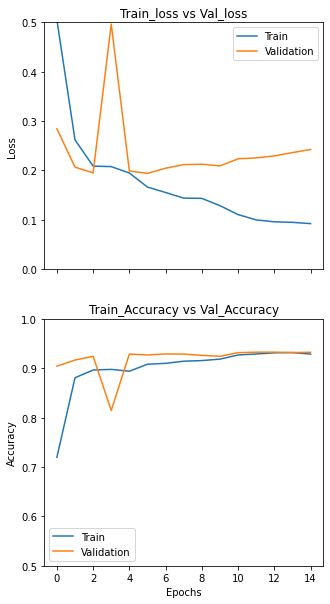

In [41]:
plot_training_log(history)

In [42]:
print(f'Test accuracy after model training {model.evaluate(test_set)[1]}')

1/1 [==============================] - 0s 242ms/step - loss: 0.1377 - accuracy: 0.9844
Test accuracy after model training 0.984375


In [43]:
random_idx = np.random.choice(main_df.shape[0])
sample_input = main_df[['Findings']].values[random_idx]
sample_output = main_df['Determination'].values[random_idx]

v, n = get_predictions(sample_input, sample_output)
print(f'Predicted output is {v} and True label is {n}')

1/1 [==============================] - 3s 3s/step
Predicted output is 0 and True label is 0


In [56]:
df['Diagnosis Category'].unique()

0                Infectious
1                    Mental
2           Autism Spectrum
3    Prevention/Good Health
4       Cardiac/Circulatory
Name: Diagnosis Category, dtype: object

In [63]:
df['Findings'][112]

'Nature of Statutory Criteria/Case Summary:  An enrollee has requested Harvoni for treatment of his hepatitis C virus (HCV). Findings: The physician reviewer found that while this patient’s record may not support advanced fibrosis, current American Association for the Study of Liver Diseases/Infectious Diseases Society of America (AASLD/IDSA) recommendations support the medical necessity and medical appropriateness of HCV treatment. Also per the guidelines, all patients with chronic hepatitis C should be treated except those with limited life expectancy due to non-liver-related conditions. This applies regardless of fibrosis stage or viral load. In addition, Harvoni carries the highest AASLD/IDSA recommendation (Rating: Class I, Level A) for treatment of HCV patients with the patient’s characteristics. `Once-daily ledipasvir-sofosbuvir with or without ribavirin for 12 or 24 weeks was highly effective in previously untreated patients with HCV genotype 1 infection. (Afdhal, et al; Gentil